# Import Packages

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load Dataset

In [56]:
df = pd.read_csv("./Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Choosing the optimum number of clusters

In [57]:
X = df.iloc[:,[0,1,2,3]]
X = X.to_numpy()

cluster_data = []

for i in range(1,20):
    kmeans = KMeans(i,init="k-means++",max_iter=1000,n_init=100,random_state=0)
    kmeans.fit(X)
    cluster_data.append(kmeans.inertia_)

# Plotting the results to find optimal cluster

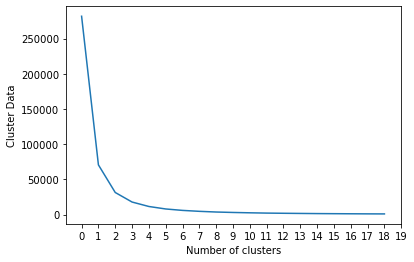

In [58]:
plt.plot(cluster_data)
plt.xlabel('Number of clusters')
plt.ylabel('Cluster Data')
plt.xticks(np.arange(0,20))
plt.show()

### From the graph, we can see that 3 is the optimal numberof clusters for this dataset.

# Training the model on optimal number of clusters

In [59]:
kmeans =KMeans(3,init='k-means++',max_iter=1000,n_init=100,random_state=0)

Y = kmeans.fit_predict(X)

# Visualize the K-Means Clusters

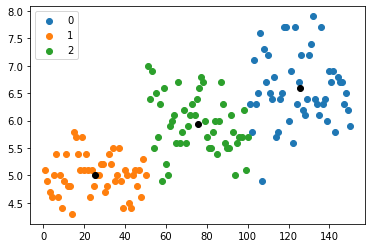

In [64]:
labels = np.unique(Y)
centroids = kmeans.cluster_centers_

for i in labels:
    plt.scatter(X[Y==i,0],X[Y==i,1],label=i)
plt.scatter(centroids[:,0],centroids[:,1], color ='black')    
plt.legend()
plt.show()